In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
#Import The Google API key.
from config import weather_api_key1


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key1
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
   
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | acarau
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | bureya
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | masindi
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | tete
Processing Record 18 of Set 1 | orhei
Processing Record 19 of Set 1 | krasnoselkup
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | half moon bay
Processing Record 22 of Set 1 | lon

Processing Record 40 of Set 4 | kutum
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | linhares
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | havoysund
Processing Record 45 of Set 4 | dubinino
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | bestobe
Processing Record 49 of Set 4 | fairbanks
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | gweru
Processing Record 3 of Set 5 | romny
Processing Record 4 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 5 of Set 5 | bojnurd
Processing Record 6 of Set 5 | strathmore
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | banff
Processing Record 9 of Set 5 | stillwater
Processing Record 10 of Set 5 | santiago del estero
Processing Record 11 of Set 5 | oktyabrskiy
Processing Record 12 of Set 5 | sitka
Processing Record 13 of Set 5 | zir

Processing Record 26 of Set 8 | san cristobal
Processing Record 27 of Set 8 | kinablangan
Processing Record 28 of Set 8 | montanha
Processing Record 29 of Set 8 | la ronge
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | jasper
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | manica
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | bogorodskoye
Processing Record 39 of Set 8 | anloga
Processing Record 40 of Set 8 | port hardy
Processing Record 41 of Set 8 | puro
Processing Record 42 of Set 8 | onega
Processing Record 43 of Set 8 | barbacoas
Processing Record 44 of Set 8 | challans
Processing Record 45 of Set 8 | omachi
Processing Record 46 of Set 8 | harper
Processing Record 47 of Set 8 | baruun-urt
Processing Record 48 of Set 8 | sira
Processing Record 49 of Set 8 | ka

City not found. Skipping...
Processing Record 12 of Set 12 | bela vista de goias
Processing Record 13 of Set 12 | aklavik
Processing Record 14 of Set 12 | raga
Processing Record 15 of Set 12 | qasigiannguit
Processing Record 16 of Set 12 | bambanglipuro
Processing Record 17 of Set 12 | gillette
Processing Record 18 of Set 12 | kargil
Processing Record 19 of Set 12 | selma
Processing Record 20 of Set 12 | balclutha
Processing Record 21 of Set 12 | posse
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | ekhabi
Processing Record 24 of Set 12 | varhaug
Processing Record 25 of Set 12 | maxixe
Processing Record 26 of Set 12 | venado tuerto
Processing Record 27 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 12 | yar-sale
Processing Record 29 of Set 12 | bam
Processing Record 30 of Set 12 | hopkinsville
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | freeport
Processing Record 33 of Set 12 | xuddur
Processing Rec

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
df = pd.DataFrame(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.45,71,25,0.98,PF,2021-01-16 14:48:03
1,Kapaa,22.0752,-159.3190,69.80,100,75,5.75,US,2021-01-16 14:48:03
2,Usinsk,65.9939,57.5281,-15.43,86,0,7.05,RU,2021-01-16 14:48:03
3,Cockburn Town,21.4612,-71.1419,80.60,74,40,6.91,TC,2021-01-16 14:48:03
4,Acarau,-2.8856,-40.1200,87.98,54,34,16.15,BR,2021-01-16 14:48:03
5,Atuona,-9.8000,-139.0333,77.45,77,1,13.27,PF,2021-01-16 14:48:03
6,Porto Novo,6.4965,2.6036,86.00,74,40,12.66,BJ,2021-01-16 14:48:03
7,Iqaluit,63.7506,-68.5145,17.60,86,90,17.27,CA,2021-01-16 14:48:04
8,Kaitangata,-46.2817,169.8464,57.07,94,97,7.87,NZ,2021-01-16 14:48:04
9,Provideniya,64.3833,-173.3000,-1.46,85,100,10.27,RU,2021-01-16 14:48:04


In [10]:

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
df = df[new_column_order]
df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-01-16 14:48:03,-23.1203,-134.9692,77.45,71,25,0.98
1,Kapaa,US,2021-01-16 14:48:03,22.0752,-159.3190,69.80,100,75,5.75
2,Usinsk,RU,2021-01-16 14:48:03,65.9939,57.5281,-15.43,86,0,7.05
3,Cockburn Town,TC,2021-01-16 14:48:03,21.4612,-71.1419,80.60,74,40,6.91
4,Acarau,BR,2021-01-16 14:48:03,-2.8856,-40.1200,87.98,54,34,16.15
...,...,...,...,...,...,...,...,...,...
558,Flinders,AU,2021-01-16 14:49:19,-34.5833,150.8552,64.00,72,0,1.01
559,Puerto Escondido,MX,2021-01-16 14:49:19,15.8500,-97.0667,71.60,88,75,4.61
560,Gazli,UZ,2021-01-16 14:49:19,40.1333,63.4500,46.53,69,0,8.10
561,Iralaya,HN,2021-01-16 14:49:19,15.0000,-83.2333,79.70,78,20,7.23


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
pd.read_csv(output_data_file)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Rikitea,-23.1203,-134.9692,77.45,71,25,0.98,PF,2021-01-16 14:48:03
1,1,Kapaa,22.0752,-159.3190,69.80,100,75,5.75,US,2021-01-16 14:48:03
2,2,Usinsk,65.9939,57.5281,-15.43,86,0,7.05,RU,2021-01-16 14:48:03
3,3,Cockburn Town,21.4612,-71.1419,80.60,74,40,6.91,TC,2021-01-16 14:48:03
4,4,Acarau,-2.8856,-40.1200,87.98,54,34,16.15,BR,2021-01-16 14:48:03
...,...,...,...,...,...,...,...,...,...,...
558,558,Flinders,-34.5833,150.8552,64.00,72,0,1.01,AU,2021-01-16 14:49:19
559,559,Puerto Escondido,15.8500,-97.0667,71.60,88,75,4.61,MX,2021-01-16 14:49:19
560,560,Gazli,40.1333,63.4500,46.53,69,0,8.10,UZ,2021-01-16 14:49:19
561,561,Iralaya,15.0000,-83.2333,79.70,78,20,7.23,HN,2021-01-16 14:49:19


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

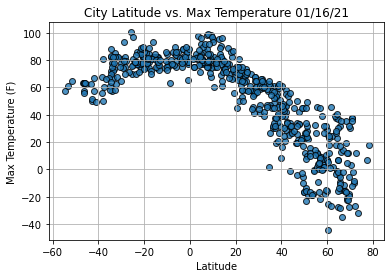

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

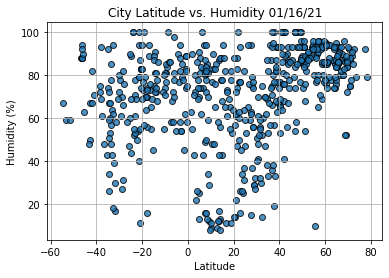

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


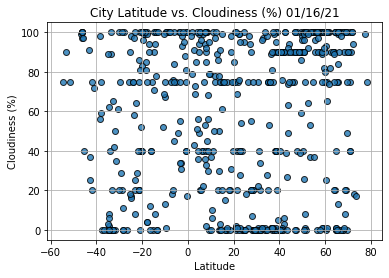

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

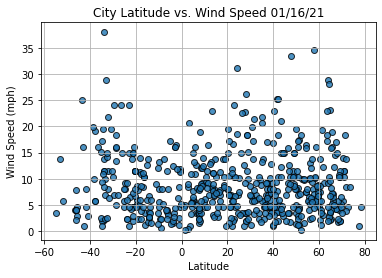

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-19-d58af2435033>, line 3)

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13



In [ ]:
city_data_df["Lat"] >= 0

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,35))